# Problem Formulation

1 Define the problem  ?

The problem is to creat a model that are going to predict the outcome of a specific speed dating session based on the profile of two people

2 What is the input ? 

the input is previous data in 5 rows × 192 columns (fetures) as train data set and 2469 rows × 191 columns (fetures) as test data set in tebular data form Speed Dating Match Prediction and we have the value of the label ''match'' is 1 if they are matched and 0 if the couble are not matched

3 What is the output?

we are going to predict the probability (0-1, float) that the dating session will lead to a successful match 

4 What data mining function is required ?

The model is classification model.
  classification is the technique to categorize elements in a collection,basis their predefined functionalities and properties. In classification, the model can classify new instances whose classification is unknown.
These particular instances that are used to create the model are called training data. Such a mechanism of classification uses methods like if-then,decision trees, neural networks, or even a set of classification rules These methods can be retrieved to identify future data.

5 What could be the challenges ?

The challenges that we have is to clean the data froma the noise in the dataset and preprocessing and the train and tist data is not the same amount and the highly unbalanced (mostly unmatched) data.

6 What is the impact ?

we are going to predict the probability (0-1, float) that the dating session will lead to a successful match  and classify the right predict Match that have the value of the label ''match'' is 1 if they are matched and 0 if the couble are not matched to help us to find the right couple that can be matched

7 What is an ideal solution ?

to my rate (XGBClassifier) after making appropriate preprocessing on the dataset and take the columns that will 
help the model to predict the right rating after clean the data set and overcome our chalenges

#Imports

In [1]:
# normal imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# sklearn imports
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score,\
                            accuracy_score,classification_report,\
                            plot_roc_curve,plot_confusion_matrix,precision_recall_fscore_support
                            
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# disable warnings i hate them
import warnings
warnings.filterwarnings('ignore')

#first look on the data and loading it

In [4]:
# # to show all the columns
# pd.options.display.max_columns = 1000 

In [5]:
# # to show all the rows
# pd.options.display.max_rows = 1000


In [4]:
df_train= pd.read_csv("/content/train.csv")   #reading train data       
df_train.head()       


,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


In [5]:
# dt=df_train= pd.read_csv("/content/train.csv")   #reading train data  
# y=dt['match']     


In [5]:
df_train.shape     #explore the shape of the train data frame

(5909, 192)

In [6]:
df_test= pd.read_csv("/content/test.csv")   #reading test data
df_test

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,...,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,...,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757
3,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275
4,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0,23,2,15,19,18,18.0,14,11,407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7982
2465,0,5,1,13,9,4,4.0,4,8,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7299
2466,1,26,2,2,19,3,NaN,15,3,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818
2467,0,19,2,9,20,11,11.0,9,2,215.0,...,7.0,12.0,12.0,9.0,NaN,NaN,NaN,NaN,NaN,937


In [7]:
df_test.shape  #explore the shape of the test data frame

(2469, 191)

# Data concat

In [9]:
# #to save the match match column 

# # y = df_train['match']  
# data = df_train.drop('match', axis=1) 
# data


,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,0,1,2,9,20,2,2.0,18,1,214.0,...,12.0,12.0,9.0,12.0,NaN,NaN,NaN,NaN,NaN,3390
5905,1,24,2,9,20,19,15.0,5,6,199.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4130
5906,0,13,2,11,21,5,5.0,3,18,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1178
5907,1,10,2,7,16,6,14.0,9,10,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5016


In [10]:
# # df_test['match']=0      # ading the lable (match) to test data because it not excit in test data but it is in train data

# df = pd.concat([data , df_test] , ignore_index=True , sort=False) 
# df.shape                 # concat the train and test data to work on both of them 


(8378, 191)

# work on data

In [14]:
# df.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


##transform

In [8]:
#convert all object columns to categorical column
df_train[df_train.select_dtypes(['object']).columns] = df_train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

##droping

In [9]:
# First, lets drop duplicates (if any)
df_train.drop_duplicates(inplace=True)

In [13]:
# Remove all columns between column name 'B' to 'D'
# df.drop(df.ix[:, 'B':'D'].columns, axis = 1)

In [9]:
df_train.drop("id",axis = 1, inplace=True)  

In [10]:
#df.drop("iid",axis = 1, inplace=True) it is not exict 

In [11]:
df_train.drop("idg",axis = 1, inplace=True)  

In [12]:
df_train.isnull().sum().sum() 


304971

In [14]:
df_test.isnull().sum().sum() 

127044

In [24]:
# #drop all the columns that contains null values more than 50 %
# df_train=df_train.loc[:, pd.isnull(df_train).sum()>len(df_train)*.5] 

In [15]:
df_train.shape

(5909, 190)

In [26]:
df_train.isnull().sum().sum() 

432015

In [27]:
## df_train = df_train.loc[:, df_train.isnull().mean() < .6]

In [28]:
# #df_train = df_train.loc[:, df_train.isin([' ','NULL',0]).mean() < .6]

In [13]:
# other way to drop all the columns that contains null values more than 50 % i will use it 
def missing(df_train):
  print (round((df_train.isnull().sum() * 100/ len(df_train)),2).sort_values(ascending=False))

missing(df_train)

num_in_3    92.22
numdat_3    82.06
expnum      78.30
amb7_2      76.48
sinc7_2     76.48
            ...  
order        0.00
position     0.00
round        0.00
wave         0.00
gender       0.00
Length: 190, dtype: float64


In [14]:
def rmissingvaluecol(df_train, threshold):
    l = []
    l = list(df_train.drop(df_train.loc[:,list((100*(df_train.isnull().sum()/len(df_train.index)) >= threshold))].columns, 1).columns.values) 
    print("# Columns having more than %s percent missing values: "%threshold, (df_train.shape[1] - len(l)))
    print("Columns:\n", list(set(list((df_train.columns.values))) - set(l)))
    return l

existing_columns = rmissingvaluecol(df_train,50) # Here threshold is 50 % which means we are going to drop columns having more than 50% of missing values. 

# Columns having more than 50 percent missing values:  59
Columns:
 ['amb3_3', 'attr7_2', 'sinc5_3', 'intel7_2', 'sinc7_3', 'amb7_2', 'attr1_s', 'expnum', 'date_3', 'amb1_s', 'intel5_3', 'attr3_3', 'sinc2_3', 'intel3_s', 'fun7_2', 'shar1_s', 'fun3_3', 'amb1_3', 'sinc7_2', 'shar7_2', 'fun3_s', 'intel1_s', 'fun4_3', 'sinc1_3', 'tuition', 'you_call', 'sinc3_s', 'fun2_3', 'intel3_3', 'intel4_3', 'sinc1_s', 'fun5_3', 'amb3_s', 'intel1_3', 'amb4_3', 'attr2_3', 'mn_sat', 'amb5_3', 'amb2_3', 'sinc3_3', 'numdat_3', 'fun1_3', 'intel2_3', 'intel7_3', 'attr3_s', 'amb7_3', 'fun1_s', 'shar4_3', 'num_in_3', 'fun7_3', 'shar7_3', 'attr4_3', 'shar2_3', 'attr5_3', 'them_cal', 'sinc4_3', 'shar1_3', 'attr1_3', 'attr7_3']


In [15]:
df_train = df_train[existing_columns]
df_train.columns.unique()

Index(['gender', 'condtn', 'wave', 'round', 'position', 'positin1', 'order',
       'partner', 'pid', 'match',
       ...
       'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2',
       'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'],
      dtype='object', length=131)

#spilte


In [23]:
# df_train_indx = df_train.shape[0]
# df_train_clean = df.iloc[: df_train_indx]
# df_train_clean_indx = df.shape[0]
# print(df_train_clean.shape)
# df_test_indx = df_test.shape[0]
# df_test_clean = df.iloc[df_train_indx : ]
# print(df_test_clean.shape) 
# # df_test_clean= df_test_clean.drop('match' , axis=1)

(5909, 130)
(2469, 130)


In [16]:
# now we can split the data
import numpy as np
from sklearn.model_selection import train_test_split

y = df_train['match'] # lower case for vector
X = df_train.drop('match', axis=1) # upper case for matrix
# X=df_train

print('original shape', X.shape, y.shape)

xtr, xts, ytr, yts = train_test_split(
    X, y, test_size=0.05, random_state=42) # i choosed the test size to be 0.05

print('yts', yts)

original shape (5909, 130) (5909,)
yts 3489    0
4909    0
1425    0
4743    0
439     0
       ..
4606    1
3575    0
1406    0
1042    0
705     0
Name: match, Length: 296, dtype: int64


In [50]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5904    0
5905    0
5906    0
5907    1
5908    0
Name: match, Length: 5909, dtype: int64

# Data exploration

In [43]:
# anything missing?
df_train.isnull().sum().sort_values(ascending=False)

income      2862
amb5_2      2821
fun5_2      2821
intel5_2    2821
sinc5_2     2821
            ... 
condtn         0
partner        0
match          0
samerace       0
gender         0
Length: 131, dtype: int64

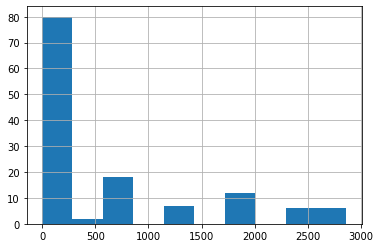

In [44]:
df_train.isnull().sum().hist()

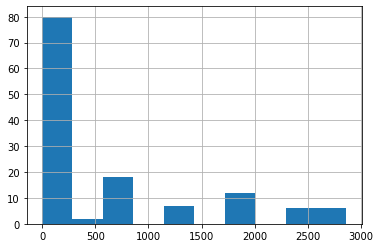

In [45]:
df_train.isnull().sum().hist()

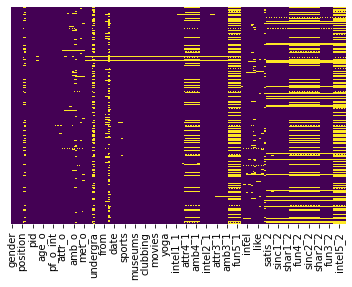

In [46]:
# plot the amount of missing values in the train features.
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

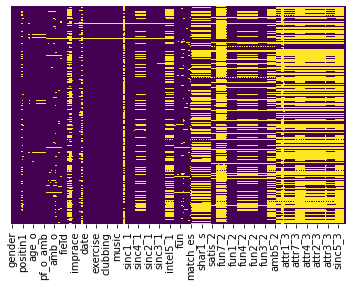

In [47]:
# plot the amount of missing values in the test features.
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
df_train.isnull().sum().sum() # sum of null values of train data before cleaning null

83021

In [49]:
# df_train_clean.isnull().sum().sum( )# sum of null values of train data after cleaning null

In [50]:
df_test.isnull().sum().sum()# sum of null values of test data before cleaning null

127044

In [51]:
# df_test_clean.isnull().sum().sum() # sum of null values of test data after cleaning null

In [52]:
#counts the null vaalues in each column from the highest to the lowest in train data
total = df_train.isnull().sum().sort_values(ascending=False) 
total

income      2862
amb5_2      2821
fun5_2      2821
intel5_2    2821
sinc5_2     2821
            ... 
condtn         0
partner        0
match          0
samerace       0
gender         0
Length: 131, dtype: int64

In [53]:
#counts the null vaalues in each column from the highest to the lowest in test data
total = df_test.isnull().sum().sort_values(ascending=False) 
total

num_in_3    2261
numdat_3    2033
expnum      1951
amb7_2      1904
sinc7_2     1904
            ... 
position       0
round          0
wave           0
condtn         0
id             0
Length: 191, dtype: int64

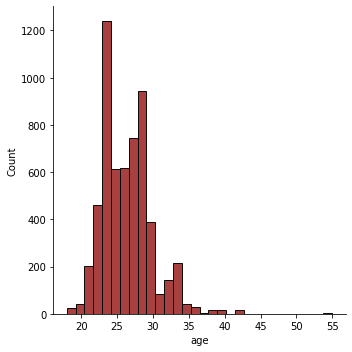

In [54]:
sns.displot(df_train['age'].dropna(),kde=False,color='darkred',bins=30)

In [55]:
# # missing values percentage per-column
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
percent

income      0.484346
amb5_2      0.477407
fun5_2      0.477407
intel5_2    0.477407
sinc5_2     0.477407
              ...   
condtn      0.000000
partner     0.000000
match       0.000000
samerace    0.000000
gender      0.000000
Length: 131, dtype: float64

,Total,Percent
num_in_3,2261.0,NaN
numdat_3,2033.0,NaN
expnum,1951.0,NaN
amb7_2,1904.0,NaN
sinc7_2,1904.0,NaN
...,...,...
round,0.0,0.0
wave,0.0,0.0
condtn,0.0,0.0
id,0.0,NaN


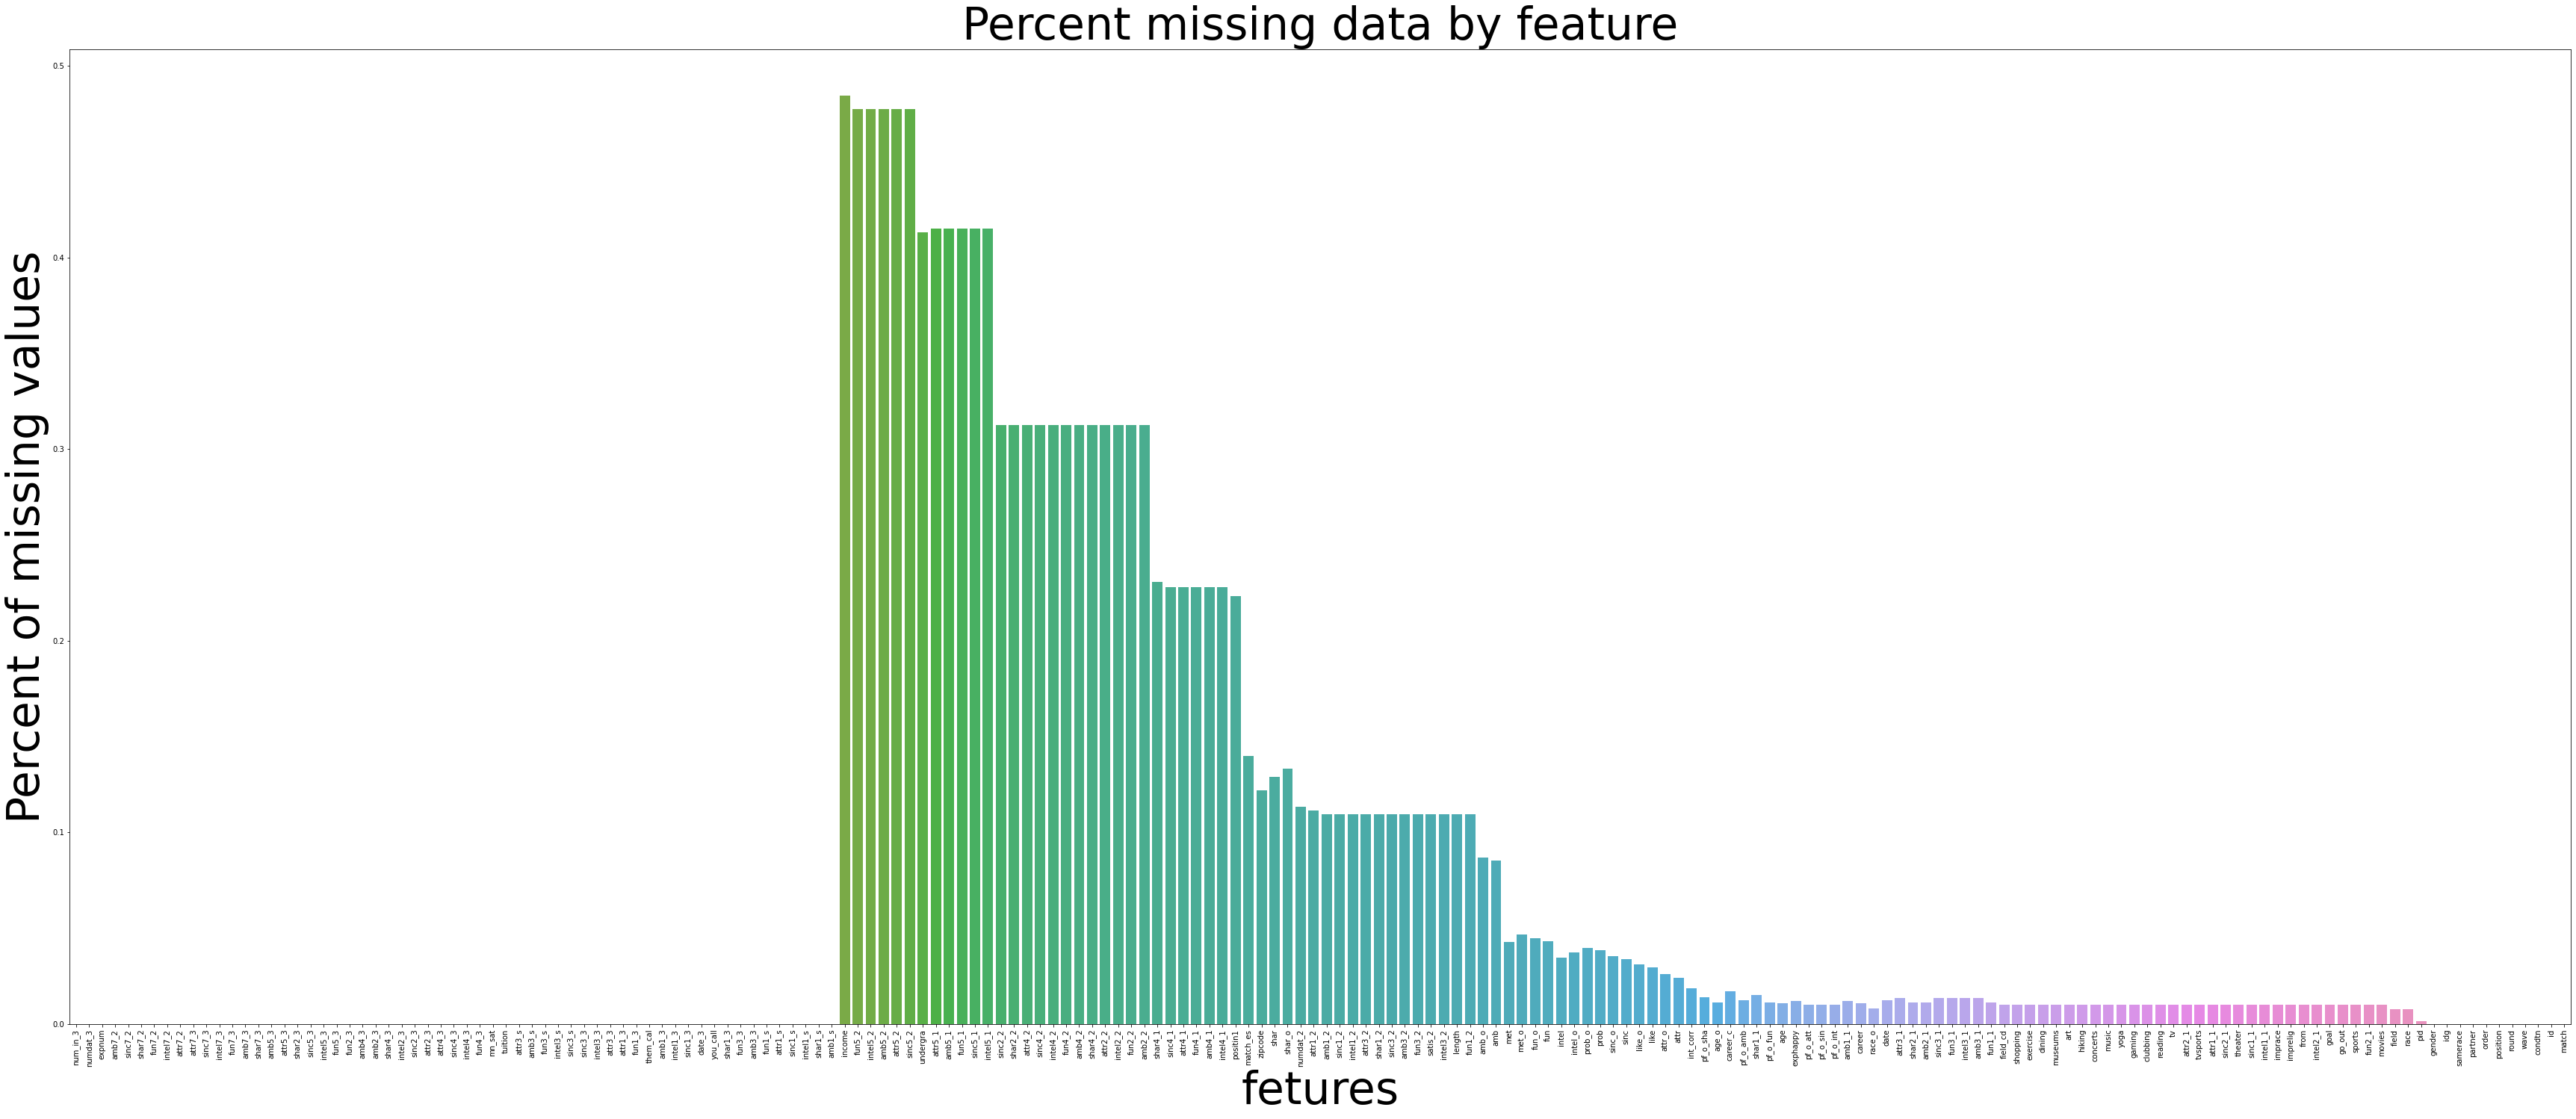

In [56]:
# # plot the count of the null vaalues in each column from high to low and missing values percentage per-column togrther
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(60, 24))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('fetures', fontsize=60)
plt.ylabel('Percent of missing values', fontsize=60)
plt.title('Percent missing data by feature', fontsize=60)
missing_data

### Visualizing numeric values

In [57]:
df_numeric = df_train.select_dtypes(include=np.number)
df_numeric.columns

Index(['gender', 'condtn', 'wave', 'round', 'position', 'positin1', 'order',
       'partner', 'pid', 'match',
       ...
       'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2',
       'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'],
      dtype='object', length=125)

In [58]:
# # co-relation
import plotly.express as px
fig1 = px.imshow(df_numeric.corr())
fig1.show()

### Visualizing categorical columns

In [59]:
df_categorical = df_train.select_dtypes(include =['object'])
df_categorical.columns

Index([], dtype='object')

##Investigating data

In [60]:
# dataframe.info(verbose,buf=buffer,max_cols,memory_usage,show_counts,null_counts)
df_train.info(verbose=True,max_cols=34,memory_usage=True,show_counts=True)  #Investigating data
df_train.info()  #another way without using parameters of df.info function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 131 columns):
 #    Column    Non-Null Count  Dtype   
---   ------    --------------  -----   
 0    gender    5909 non-null   int64   
 1    condtn    5909 non-null   int64   
 2    wave      5909 non-null   int64   
 3    round     5909 non-null   int64   
 4    position  5909 non-null   int64   
 5    positin1  4591 non-null   float64 
 6    order     5909 non-null   int64   
 7    partner   5909 non-null   int64   
 8    pid       5901 non-null   float64 
 9    match     5909 non-null   int64   
 10   int_corr  5800 non-null   float64 
 11   samerace  5909 non-null   int64   
 12   age_o     5844 non-null   float64 
 13   race_o    5861 non-null   float64 
 14   pf_o_att  5850 non-null   float64 
 15   pf_o_sin  5850 non-null   float64 
 16   pf_o_int  5850 non-null   float64 
 17   pf_o_fun  5843 non-null   float64 
 18   pf_o_amb  5836 non-null   float64 
 19   pf_o_sha  5826 non-null  

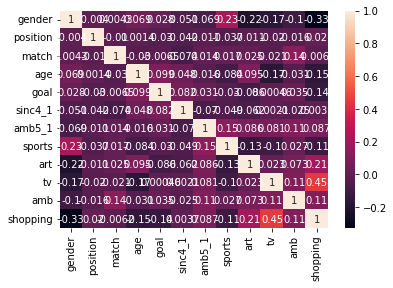

In [61]:
# Looking for highly co-related data and then deleting the rows respectively.
import seaborn as sns
sns.heatmap(data=df_train[['gender', 'position', 'match', 'age', 'goal', 'sinc4_1', 'amb5_1', 'sports', 'art', 'tv', 'amb', 'shopping']].corr(), annot=True)

In [62]:
df_train.drop(['shopping'], axis=1) 

,gender,condtn,wave,round,position,positin1,order,partner,pid,match,...,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
0,0,2,14,18,2,2.0,14,12,372.0,0,...,10.0,10.0,10.0,9.0,10.0,10.0,9.0,10.0,9.0,10.0
1,1,1,3,10,2,NaN,8,8,63.0,0,...,6.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
2,1,1,13,10,8,8.0,10,10,331.0,0,...,7.0,9.0,9.0,8.0,10.0,7.0,9.0,8.0,7.0,9.0
3,1,2,9,20,18,13.0,6,7,200.0,0,...,8.0,9.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,2,14,20,6,6.0,20,17,357.0,0,...,7.0,8.0,9.0,9.0,8.0,7.0,7.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,0,2,9,20,2,2.0,18,1,214.0,0,...,10.0,10.0,10.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN
5905,1,2,9,20,19,15.0,5,6,199.0,0,...,6.0,9.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
5906,0,2,11,21,5,5.0,3,18,290.0,0,...,7.0,10.0,9.0,8.0,4.0,6.0,10.0,8.0,9.0,7.0
5907,1,2,7,16,6,14.0,9,10,151.0,1,...,7.0,7.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN


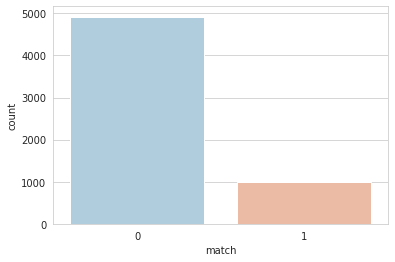

In [63]:
# the count of the matched vs not matched
sns.set_style('whitegrid')
sns.countplot(x='match', data=df_train,palette='RdBu_r')

In [64]:
df_train.isnull() #diffrent way to insure if there is null values to delete 

,gender,condtn,wave,round,position,positin1,order,partner,pid,match,...,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
5905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
5906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True


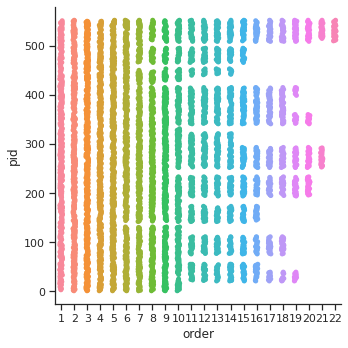

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="order", y="pid", data=df_train)

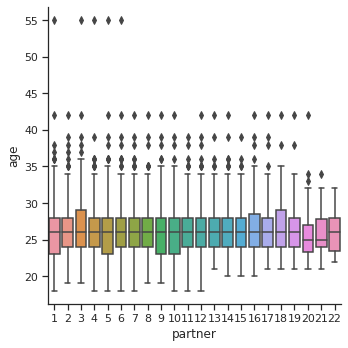

In [71]:
# partner distribution w.r.t age with  kind="box"
sns.catplot(x="partner", y="age", kind="box",  data=df_train)

In [65]:
df_train.describe()

,gender,condtn,wave,round,position,positin1,order,partner,pid,match,...,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,5909.000000,...,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000
mean,0.505331,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,0.167203,...,7.131889,7.955340,8.241543,7.591790,7.498670,6.839054,7.433290,7.859780,7.284326,7.356865
std,0.500014,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,0.373188,...,1.385184,1.486971,1.177790,1.540505,1.746286,1.425735,1.569496,1.268374,1.647053,1.524100
min,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,0.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,0.000000,...,7.000000,7.000000,8.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,1.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,0.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,1.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,0.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,9.000000,8.000000,8.000000
max,1.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.00000,22.000000,552.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


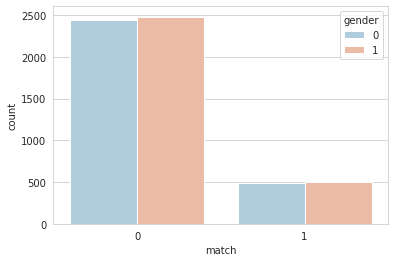

In [66]:
# is the number of males and females have a same match or there is a difference between the match details of the males and females.
sns.set_style('whitegrid')
sns.countplot(x='match', hue='gender', data=df_train,palette='RdBu_r')

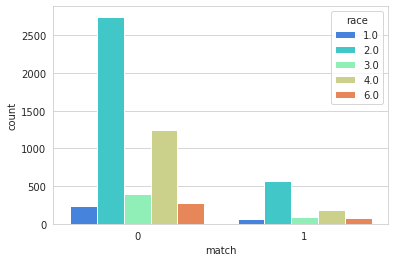

In [67]:
# Trying to understand if race has an impact on the match
sns.set_style('whitegrid')
sns.countplot(x='match', hue='race', data=df_train,palette='rainbow')

##Multivariate feature imputation

In [17]:
## first, we have to convert all categorical to numeric:

# make a copy
df_train=df_converted = df_train.copy()

for col_name in df_converted.columns:
    if(df_converted[col_name].dtype == 'object'):
        df_converted[col_name] = df_converted[col_name].astype('category')
        df_converted[col_name] = df_converted[col_name].cat.codes
        

In [77]:
# df_train_clean=df_train_clean.fillna(df_train.mean())


#trail 1

in the first trail i run the code without any running of the preprossing code above i took the data as it is and i expected the result to be very bad we will se at the end of this trail 

using logistic regression model

using mean strategy to filll the nan 

using Grid Search with Cross-validation






##pipline

##extrat numeric features and cat features names

In [19]:
# we extract numeric features and categorical features names
# for later use

# numeric features can be selected by: (based on the df2.info() output )
features_numeric = list(xtr.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df2.info() output )
features_categorical = list(xtr.select_dtypes(include=['category']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['gender', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2',

In [9]:
#import pipeline with the imputer
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           LogisticRegression(), # using LogisticRegression model
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [10]:
# The pipeline object 
full_pipline = full_pipline.fit(xtr, ytr)
full_pipline.predict(df_train)

array([0, 0, 0, ..., 0, 1, 0])

## Grid Search with Cross-validation

We can tune the hyperparameters (including different preprocessing configurations using cross-validation and grid-search). Grid search tests all possible combination of hyperparameters by the options and ranges you specified.

In [14]:

# here we specify the search space
# `__` denotes an attribute of the preceeding name3  
# q1
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean',],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    # 'my_classifier__n_estimators': [25, 30, 35],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    # 'my_classifier__max_depth':[5, 7, 10]       
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(xtr, ytr)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
best score 0.8491691268423679
best score {'preprocessor__num__imputer__strategy': 'mean'}


In [17]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
grid_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [18]:

submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test)[:,1]

submission.to_csv('sample_submission_trail 1.csv', index=False)

final resultes of trail 1 

best score 0.8491691268423679

best score {'preprocessor__num__imputer__strategy': 'mean'}

Score: 0.85240
Public score: 0.86589



#trail 2

in the socend trail i run the code without any running of the preprossing code above i took the data as it is and i expected the result to be very bad we will se at the end of this trail 

using logistic regression model

using mean strategy to filll the nan 

using Grid Search with validation set

## Grid Search with validation set

Cross-validation is expensive. We can supply our own validation set

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit

# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    xtr, ytr, train_size = 0.9, stratify = ytr, random_state = 3)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in xtr.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

grid_search = GridSearchCV(
    full_pipline, param_grid, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
grid_search.fit(xtr, ytr)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8123520793418235
best score {'preprocessor__num__imputer__strategy': 'mean'}


In [20]:
grid_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test)[:,1]

submission.to_csv('trail 2.csv', index=False)

final resultes of trail 2

best score 0.8123520793418235

best score {'preprocessor__num__imputer__strategy': 'mean'}

Score: 0.85926
Public score: 0.86621



#trail 3

in the third trail i run the code without any running of the preprossing code above i took the data as it is and i expected the result to be very bad we will se at the end of this trail

using logistic regression model

using mean strategy to filll the nan

using random search

incresing the cv to be 10

n_iter=10,

## Random Search 

Grid search (global optimal) is expensive when you specify a large search space. Alternatively, random search CV give you local optimal (may be good enough and even more generalizable)

In [34]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

grid_search = RandomizedSearchCV(
    full_pipline, param_grid, cv=10, verbose=2, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

grid_search.fit(xtr, ytr)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
best score 0.8526580379060753
best score {'preprocessor__num__imputer__strategy': 'mean'}


In [35]:
grid_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test)[:,1]

submission.to_csv('trail 3.csv', index=False)

final results of trail 3

best score 0.8526580379060753

best score {'preprocessor__num__imputer__strategy': 'mean'

Score: 0.85240
Public score: 0.86589

#trail 4

in the forth trail i run the code without any running of the preprossing code above i took the data as it is and i expected the result to be very bad we will se at the end of this trail

using logistic regression model

using mean strategy to filll the nan

using bayesian search

decresing the cv to be 5

(class_weight='unbalanced')

n_iter=3,

## Bayesian Search

We can interpret the hyperparameter search problem as a non-differentiable optimization problem, and use bayesian learning to predict what is the next hyperparamter values we should try given the current trials. 



In [42]:
!pip install scikit-optimize

ببببب

In [ ]:
# Let's try this with SVM model
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC


SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced'))
    ]
)
# SVC has a class_weight attribute for unbalanced data


# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    # number of trials 
    n_iter=3,
    random_state=1,
    verbose=1,
    # we still use 
    cv=5,
)

bayes_search.fit(xtr,ytr)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [45]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
bayes_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test)[:,1]

submission.to_csv('sample_submission_walkthroughsvm.csv', index=False)

Score: 0.85589
Public score: 0.86633

Score: 0.85926
Public score: 0.86621

#trail 5

in the fifth trail i run the code using preprossing code above i took the cleand data and i expected the result to be better we will see at the end of this trail

using XGBClassifier regression model

let the model to choose between ('mean' or 'most_frequent') to filll the nan


I changed the hyperbrameters 'my_classifier__n_estimators': to be: [105,300], 

decresing the cv to be 5

(class_weight='balanced')

n_iter=3,

'mean','most_frequent','median','constant'

using grid search with cross validation

##pipline

In [20]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(), # i tried other models but this model pridected high score with this hyperprameters
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_f

In [ ]:
# The pipeline object 
full_pipline = full_pipline.fit(xtr, ytr)
full_pipline.predict(df_train)

array([0, 0, 0, ..., 0, 1, 0])

## Grid Search with Cross-validation

We can tune the hyperparameters (including different preprocessing configurations using cross-validation and grid-search). Grid search tests all possible combination of hyperparameters by the options and ranges you specified.

In [27]:

# here we specify the search space
# `__` denotes an attribute of the preceeding name3  
# q1
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [105,300],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[5, 7, 10]       
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(xtr, ytr)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
best score 0.872325972520985
best score {'my_classifier__max_depth': 5, 'my_classifier__n_estimators': 300, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# grid_search.fit(xtr, ytr)


In [28]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
grid_search.predict(df_test)

array([0, 1, 0, ..., 0, 0, 0])

In [31]:

submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test)[:,1]

submission.to_csv('ttrail 5.csv', index=False)

trail 5

finally i found that this is the best model till now on kaggels results as i meention the scores bellow rasing the max debth to be my_classifier__n_estimators': [105,300], 

best score 0.872325972520985

best score {'my_classifier__max_depth': 5, 

'my_classifier__n_estimators': 300,

 'preprocessor__num__imputer__strategy': 'mean'}

 
Submitted by Ahmed Nouser · Submitted a few seconds ago

Score: 0.88193
Public score: 0.88149 on kaggle 



#trail 6

in the sixth trail i run the code using preprossing code above i took the cleand data and i expected the result to be better we will see at the end of this trail

using XGBClassifier regression model

let the model to choose between ('mean' or 'most_frequent') to filll the nan


I changed the hyperbrameters 'my_classifier__n_estimators': to be: [105,300], 

decresing the cv to be 5

(class_weight='balanced')

n_iter=3,

'mean','most_frequent','median','constant'

i changed the rondome state to be 1

 using Grid Search with validation set

## Grid Search with validation set

Cross-validation is expensive. We can supply our own validation set

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit

# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    xtr, ytr, train_size = 0.9, stratify = ytr, random_state = 1)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in xtr.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

grid_search = GridSearchCV(
    full_pipline, param_grid, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
grid_search.fit(xtr, ytr)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 6 candidates, totalling 6 fits
best score 0.8847965738758029
best score {'my_classifier__max_depth': 7, 'my_classifier__n_estimators': 300, 'preprocessor__num__imputer__strategy': 'mean'}


In [33]:
grid_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test)[:,1]

submission.to_csv('trail 6.csv', index=False)

final result trail 6 

it is the best till now for me the highest score on kaggle

best score 0.8847965738758029
best score {'my_classifier__max_depth': 7, 'my_classifier__n_estimators': 300, 'preprocessor__num__imputer__strategy': 'mean'}

Score: 0.88484            kaggle 
Public score: 0.88166

#trail 7

in the seventh trail i run the code using preprossing code above i took the cleand data and i expected the result to be better we will see at the end of this trail

using XGBClassifier regression model

let the model to choose between ('mean' or 'most_frequent') to filll the nan


I changed the hyperbrameters 'my_classifier__n_estimators': to be: [105,300], 


n_iter=10,

'mean','most_frequent','median','constant'

i changed the rondome state to be 1

 using Random Search

## Random Search 

Grid search (global optimal) is expensive when you specify a large search space. Alternatively, random search CV give you local optimal (may be good enough and even more generalizable)

In [35]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

grid_search = RandomizedSearchCV(
    full_pipline, param_grid, cv=pds, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

grid_search.fit(xtr, ytr)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 6 candidates, totalling 6 fits
best score 0.8847965738758029
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 300, 'my_classifier__max_depth': 7}


In [36]:
grid_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test)[:,1]

submission.to_csv('trail 7.csv', index=False)

final result trail 7

best score 0.8847965738758029
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 300, 'my_classifier__max_depth': 7

best score 0.8847965738758029


#trail 8

in the final trail i run the code using preprossing code above i took the cleand data and i expected the result to be worestand the score decreses we will see at the end of this trail

using XGBClassifier regression model

let the model to choose between ('mean' or 'most_frequent') to filll the nan


I changed the hyperbrameters 'my_classifier__n_estimators': to be: [105,300], 


n_iter=10,

'mean','most_frequent','median','constant'


 using Bayesian Search

## Bayesian Search

We can interpret the hyperparameter search problem as a non-differentiable optimization problem, and use bayesian learning to predict what is the next hyperparamter values we should try given the current trials. 



In [38]:
!pip install scikit-optimize

In [39]:
# Let's try this with SVM model
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC


SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced'))
    ]
)
# SVC has a class_weight attribute for unbalanced data


# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    # number of trials 
    n_iter=3,
    random_state=0,
    verbose=1,
    # we still use 
    cv=pds,
)

bayes_search.fit(xtr, ytr)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8167259786476868
best score OrderedDict([('my_svc__C', 0.0012602593949011189), ('my_svc__degree', 8), ('my_svc__gamma', 2.285959941576884), ('my_svc__kernel', 'poly')])


In [40]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
bayes_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test)[:,1]

submission.to_csv('trail 8.csv', index=False)

Score: 0.85926
Public score: 0.86621

#final results

the svm decreseees the score as i expected but the bestscore was final result trail 6 

it is the best till now for me the highest score on kaggle

best score 0.8847965738758029
best score {'my_classifier__max_depth': 7, 'my_classifier__n_estimators': 300, 'preprocessor__num__imputer__strategy': 'mean'}

Score: 0.88484            kaggle 
Public score: 0.88166

in the sixth trail i run the code using preprossing code above i took the cleand data and i expected the result to be better we will see at the end of this trail

using XGBClassifier regression model

let the model to choose between ('mean' or 'most_frequent') to filll the nan


I changed the hyperbrameters 'my_classifier__n_estimators': to be: [105,300], 

decresing the cv to be 5

(class_weight='balanced')

n_iter=3,

'mean','most_frequent','median','constant'

i changed the rondome state to be 1

 using Grid Search with validation set

# Questions

🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

🌈What's a decision tree and how it is different to a logistic regression model?

🌈What's the difference between grid search and random search?

🌈What's the difference between bayesian search and random search?

## 1

🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

1-we have two differnt resones that explain why Linear Regression is not suitable for classification.  

(a) Linear Regression work with continuous values but classification problems is discrete values.
(b) The second problem is regarding the shift in threshold value when new data points are added.

but Logistic regression is classification model despite its name and it provides discreet output

the perceptron can be used as a binary classification model, defining a linear decision boundary. It finds the separating hyperplane that minimizes the distance between misclassified points and the decision boundary


## 2 

🌈What's a decision tree and how it is different to a logistic regression model?

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

different to a logistic regression model

Logistic Regression and trees differ in the way that they generate decision boundaries i.e. the lines that are drawn to separate different classes,Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two.

1-Logistic Regression assumes that the data is linearly (or curvy linearly) Decision Trees are non-linear classifiers

2-Categorical data works well with Decision Trees, while continuous data work well with Logistic Regression

3-Logistic Regression does not handle skewed classes well,Decision Trees handle skewed classes nicely if we let it grow fully.

4-Decision Trees works with missing values, Logistic Regression does not handle missing values


Logistic Regression and trees differ in the way that they generate decision boundaries i.e. the lines that are drawn to separate different classes

## 3

🌈What's the difference between grid search and random search?

Grid Search:Define a search space as a grid of hyperparameter values and evaluate every position in the grid.

Random Search: Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.



It may look like grid search is the better option, compared to the random one, but bare in mind that when the dimensionality is high, the number of combinations you have to search is enormous. For example, to grid-search ten boolean (yes/no) parameters you will have to test 1024 different combinations. That is why random search, sometimes combined with clever heuristics, is often used.

## 4

🌈What's the difference between bayesian search and random search?

Bayesian optimization methods are efficient because they select hyperparameters in an informed manner. By prioritizing hyperparameters that appear more promising from past results, Bayesian methods can find the best hyperparameters in lesser time (in fewer iterations) than both grid search and random search.


Random search
Try out a random subset
good enough
Local optimal (within the given range)
Efficient (less trials)
Sklearn: model_selection.RandomizedSearchCV

Bayesian Optimization
As an optimization problem
Trial -> estimated error -> Bayesian model estimates the next
parameter to try -> trial -> repeat
pip install bayesian-optimization

Bayesian Search: Based upon Bayes Rule and considers previously known knowledge to help narrow down the search space of good hyperparameter combinations.
Bayesian Search usually takes more time than Random Search